In [15]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [16]:
trn_data_path = '/root/autodl-tmp/xingmei/Sharechat-RecSys-Challenge-23/data/train.csv'
tst_data_path = '/root/autodl-tmp/xingmei/Sharechat-RecSys-Challenge-23/raw_data/test/000000000000.csv'

In [ ]:
trn_df = pd.read_csv(trn_data_path, sep='\t')
tst_df = pd.read_csv(tst_data_path, sep='\t')

In [4]:
trn_row_null = trn_df.isnull().sum(axis=1)
tst_row_null = tst_df.isnull().sum(axis=1)

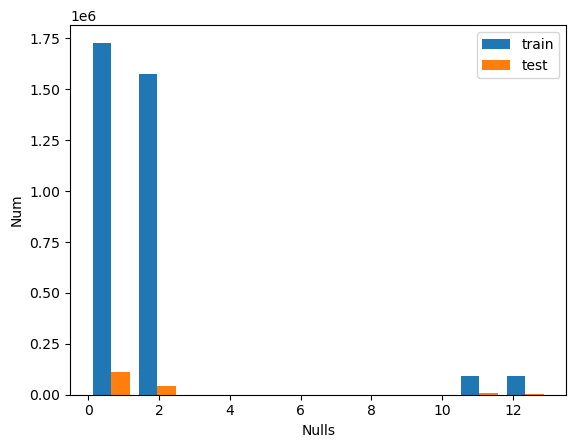

Train statistic - Mean: 1.53 | Median 2.00 | Min: 0.00 | Max 13.00
Test  statistic - Mean: 1.21 | Median 0.00 | Min: 0.00 | Max 13.00


In [11]:
plt.hist([trn_row_null, tst_row_null], label=['train', 'test'], align='mid')
plt.legend(loc='best')
plt.xlabel('Nulls')
plt.ylabel('Num')
plt.savefig(f'./row_null.png')
plt.show()
plt.close()

print(f"Train statistic - "
        f"Mean: {trn_row_null.mean():.2f} | Median {trn_row_null.median():.2f} | "
        f"Min: {trn_row_null.min():.2f} | Max {trn_row_null.max():.2f}"
    )
print(f"Test  statistic - "
        f"Mean: {tst_row_null.mean():.2f} | Median {tst_row_null.median():.2f} | "
        f"Min: {tst_row_null.min():.2f} | Max {tst_row_null.max():.2f}"
)

In [16]:
print(trn_row_null.unique())
print(tst_row_null.unique())

[ 2  0 13 11]
[ 2  0 11 13]


In [14]:
for i in [0, 2, 11, 13]:
    for s, df in zip(['train', 'test'], [trn_row_null, tst_row_null]):
        print(s, f'{(df == i).mean():.2f}')

train 0.50
test 0.68
train 0.45
test 0.26
train 0.03
test 0.05
train 0.03
test 0.02


In [17]:
trn_col_null = trn_df.isnull().sum(axis=0)
tst_col_null = tst_df.isnull().sum(axis=0)

In [21]:
trn_col_null[trn_col_null != 0]

f_30    1666968
f_31    1666968
f_43     181427
f_51     181427
f_58     181427
f_59     181427
f_64     181427
f_65     181427
f_66     181427
f_67     181427
f_68     181427
f_69     181427
f_70     181427
dtype: int64

In [22]:
tst_col_null[tst_col_null != 0]

f_30    43867
f_31    43867
f_43     9767
f_51     9767
f_58     9767
f_59     9767
f_64     9767
f_65     9767
f_66     9767
f_67     9767
f_68     9767
f_69     9767
f_70     9767
dtype: int64

In [34]:
null_col = list(tst_col_null[tst_col_null != 0].index)

In [27]:
trn_df[trn_df['f_30'].isnull()]['f_31'].isnull().sum()

1666968

In [28]:
tst_df[tst_df['f_30'].isnull()]['f_31'].isnull().sum()

43867

In [36]:
trn_df[trn_df['f_43'].isnull()][null_col].isnull().all()

f_30    False
f_31    False
f_43     True
f_51     True
f_58     True
f_59     True
f_64     True
f_65     True
f_66     True
f_67     True
f_68     True
f_69     True
f_70     True
dtype: bool

In [38]:
tst_df[tst_df['f_43'].isnull()][null_col].isnull().all()

f_30    False
f_31    False
f_43     True
f_51     True
f_58     True
f_59     True
f_64     True
f_65     True
f_66     True
f_67     True
f_68     True
f_69     True
f_70     True
dtype: bool